In [1]:
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

import numpy as np
# импортируем библиотеку pandas
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

# cчитываем данные и выводим первые 5 наблюдений
gl = pd.read_csv('Data/game_logs.csv')
gl.head()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [2]:
# Оставим только нужны колонки
nes_cols = ['date','number_of_game','day_of_week','v_name','v_game_number','h_name',
            'h_game_number','v_score','h_score','day_night']

df = gl[nes_cols]
df.head()

,date,number_of_game,day_of_week,v_name,v_game_number,h_name,h_game_number,v_score,h_score,day_night
0,18710504,0,Thu,CL1,1,FW1,1,0,2,D
1,18710505,0,Fri,BS1,1,WS3,1,20,18,D
2,18710506,0,Sat,CL1,2,RC1,1,12,4,D
3,18710508,0,Mon,CL1,3,CH1,1,12,14,D
4,18710509,0,Tue,BS1,2,TRO,1,9,5,D


In [3]:
# установим категориальные переменные 
df['day_of_week'] = df['day_of_week'].astype("category")
df['v_name'] = df['v_name'].astype("category")
df['h_name'] = df['h_name'].astype("category")
df['day_night'] = df['day_night'].astype("category")

## Зачем в Pandas Pivot?

In [15]:
#  создается с помощью 
# data, values, index, columns, aggfunc, fill_value, margins

pd.pivot_table(df, index = ['day_of_week'])

,date,h_game_number,h_score,length_outs,number_of_game,v_game_number,v_score
day_of_week,,,,,,,
Fri,1.956090e+07,76.801487,4.678952,53.675758,0.158278,76.806894,4.378379
Mon,1.948035e+07,77.024539,4.760498,53.606085,0.278212,77.031103,4.482547
Sat,1.950891e+07,77.694265,4.793465,53.619064,0.242255,77.700322,4.443183
Sun,1.961876e+07,80.232839,4.557391,53.456750,0.528940,80.033532,4.348186
Thu,1.947697e+07,74.677410,4.747704,53.610364,0.188154,74.680854,4.457897
Tue,1.953568e+07,75.570097,4.706433,53.699911,0.193957,75.572829,4.447342
Wed,1.953919e+07,76.087413,4.680705,53.699007,0.218238,76.111164,4.407377


In [19]:
# добавим индексов
pd.pivot_table(df.head(100), index = ['day_of_week', 'day_night', 'number_of_game'])

,,,date,h_game_number,h_score,v_game_number,v_score
day_of_week,day_night,number_of_game,,,,,
Fri,D,0,1.871067e+07,14.562500,11.750000,12.562500,9.937500
Mon,D,0,1.871065e+07,11.826087,12.304348,12.217391,10.217391
Sat,D,0,1.871062e+07,10.400000,10.533333,9.066667,9.533333
Thu,D,0,1.871066e+07,10.388889,7.611111,12.555556,9.722222
Tue,D,0,1.871067e+07,12.533333,11.333333,12.000000,9.333333
Wed,D,0,1.871064e+07,10.769231,12.230769,12.615385,11.384615


In [20]:
# установим значение, которое будет в расчете (## mean основной агрегат)
pd.pivot_table(df.head(100), 
               index = ['day_of_week', 'day_night', 'number_of_game'], 
               values = ['v_score']) 

,,,v_score
day_of_week,day_night,number_of_game,
Fri,D,0,9.937500
Mon,D,0,10.217391
Sat,D,0,9.533333
Thu,D,0,9.722222
Tue,D,0,9.333333
Wed,D,0,11.384615


In [29]:
# добавим функцию агрегата
pd.pivot_table(df, 
               index = ['day_of_week', 'day_night', 'number_of_game'], 
               values = ['v_score'],
               aggfunc = np.sum).head(10)

v_score
day_of_week day_night number_of_game         
Fri         D         0                 27201
                      1                  3015
                      2                  2387
            N         0                 53000
                      1                  1389
                      2                  1917
Mon         D         0                 24012
                      1                  4998
                      2                  4689
            N         0                 29259

In [30]:
# количество агрегатов не ограничено! 
pd.pivot_table(df, 
               index = ['day_of_week', 'day_night', 'number_of_game'], 
               values = ['v_score'],
               aggfunc = [np.sum, np.mean, 'count']).head(10)

sum      mean   count
                                     v_score   v_score v_score
day_of_week day_night number_of_game                          
Fri         D         0                27201  4.497520    6048
                      1                 3015  4.506726     669
                      2                 2387  4.129758     578
            N         0                53000  4.214042   12577
                      1                 1389  3.869081     359
                      2                 1917  4.269488     449
Mon         D         0                24012  4.633732    5182
                      1                 4998  4.246389    1177
                      2                 4689  4.171708    1124
            N         0                29259  4.307228    6793

In [32]:
# добавим колонки 
pd.pivot_table(df, 
               index = ['day_of_week', 'day_night'], 
               columns = ['number_of_game'],
               values = ['v_score'],
               aggfunc = [np.sum,]).head(10)

sum                       
                       v_score                       
number_of_game               0        1        2    3
day_of_week day_night                                
Fri         D          27201.0   3015.0   2387.0  NaN
            N          53000.0   1389.0   1917.0  NaN
Mon         D          24012.0   4998.0   4689.0  NaN
            N          29259.0    551.0    815.0  NaN
Sat         D          56344.0   7447.0   6457.0  0.0
            N          29035.0    398.0   1187.0  NaN
Sun         D          65963.0  18493.0  17567.0  NaN
            N           3110.0     70.0    648.0  NaN
Thu         D          40086.0   4026.0   3512.0  NaN
            N          24971.0    504.0    894.0  NaN

In [34]:
# сводная таблица расширяется при добавление новых значений или колонок
pd.pivot_table(df, 
               index = ['day_of_week', 'day_night'], 
               columns = ['number_of_game'],
               values = ['v_score', 'h_score'],
               aggfunc = [np.sum,],
               fill_value = 0).head(10)

sum                                          
                      h_score                  v_score                 
number_of_game              0      1      2  3       0      1      2  3
day_of_week day_night                                                  
Fri         D           28735   3005   2617  0   27201   3015   2387  0
            N           55648   1536   1841  0   53000   1389   1917  0
Mon         D           24579   5343   5179  0   24012   4998   4689  0
            N           29922    590    862  0   29259    551    815  0
Sat         D           59244   7638   6666  6   56344   7447   6457  0
            N           30008    431   1273  0   29035    398   1187  0
Sun         D           68298  19314  18349  0   65963  18493  17567  0
            N            3340     76    693  0    3110     70    648  0
Thu         D           41062   4016   3817  0   40086   4026   3512  0
            N           25898    549    811  0   24971    504    894  0

In [38]:
# заполним пустоты
pd.pivot_table(df, 
               index = ['day_of_week', 'day_night'], 
               columns = ['number_of_game'],
               values = ['v_score', 'h_score'],
               aggfunc = [np.sum,],
               fill_value = 0, 
               margins=True).head(10)

sum                                                 \
                      h_score                          v_score                 
number_of_game              0      1      2  3     All       0      1      2   
day_of_week day_night                                                          
Fri         D           28735   3005   2617  0   34357   27201   3015   2387   
            N           55648   1536   1841  0   59025   53000   1389   1917   
Mon         D           24579   5343   5179  0   35101   24012   4998   4689   
            N           29922    590    862  0   31374   29259    551    815   
Sat         D           59244   7638   6666  6   73554   56344   7447   6457   
            N           30008    431   1273  0   31712   29035    398   1187   
Sun         D           68298  19314  18349  0  105961   65963  18493  17567   
            N            3340     76    693  0    4109    3110     70    648   
Thu         D           41062   4016   3817  0   48895   40086   4026   3512   
            N           25898    549    811  0   27258   24971    504    894   

                                  
                                  
number_of_game         3     All  
day_of_week day_night             
Fri         D          0   32603  
            N          0   56306  
Mon         D          0   33699  
            N          0   30625  
Sat         D          0   70248  
            N          0   30620  
Sun         D          0  102023  
            N          0    3828  
Thu         D          0   47624  
            N          0   26369

In [49]:
# посчитаем сумму по столбцу и по колонке 
pd.pivot_table(df, 
               index = ['day_of_week', 'day_night'], 
               columns = ['number_of_game'],
               values = ['v_score', 'h_score'],
               aggfunc = {"v_score": np.mean, 'h_score': np.sum,},
               fill_value = 0, 
               margins=True).head(10)

h_score                            v_score            \
number_of_game              0      1      2  3     All         0         1   
day_of_week day_night                                                        
Fri         D           28735   3005   2617  0   34357  4.497520  4.506726   
            N           55648   1536   1841  0   59025  4.214042  3.869081   
Mon         D           24579   5343   5179  0   35101  4.633732  4.246389   
            N           29922    590    862  0   31374  4.307228  4.142857   
Sat         D           59244   7638   6666  6   73554  4.417059  4.467307   
            N           30008    431   1273  0   31712  4.351769  4.020202   
Sun         D           68298  19314  18349  0  105961  4.402523  4.297699   
            N            3340     76    693  0    4109  4.141145  4.666667   
Thu         D           41062   4016   3817  0   48895  4.506070  4.371336   
            N           25898    549    811  0   27258  4.268547  4.165289   

                                              
number_of_game                2  3       All  
day_of_week day_night                         
Fri         D          4.129758  0  4.469225  
            N          4.269488  0  4.206649  
Mon         D          4.171708  0  4.503408  
            N          4.289474  0  4.303682  
Sat         D          4.345222  0  4.415336  
            N          4.254480  0  4.343262  
Sun         D          4.218780  0  4.350661  
            N          4.180645  0  4.156352  
Thu         D          4.175981  0  4.468381  
            N          4.515152  0  4.274437

In [35]:
# обратите внимание на колонки и индексы
pd.pivot_table(df, 
               index = ['day_of_week', 'day_night'], 
               columns = ['number_of_game'],
               values = ['v_score', 'h_score'],
               aggfunc = [np.sum,],
               fill_value = 0).columns

MultiIndex(levels=[['sum'], ['h_score', 'v_score'], [0, 1, 2, 3]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]],
           names=[None, None, 'number_of_game'])

In [50]:
pd.pivot_table(df, 
               index = ['day_of_week', 'day_night'], 
               columns = ['number_of_game'],
               values = ['v_score', 'h_score'],
               aggfunc = [np.sum,],
               fill_value = 0).index

MultiIndex(levels=[['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], ['D', 'N']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['day_of_week', 'day_night'])

In [27]:
# но простой способ получения нужных данных
pvt = pd.pivot_table(df, 
                   index = ['day_of_week', 'day_night'], 
                   columns = ['number_of_game'],
                   values = ['v_score', 'h_score'],
                   aggfunc = {"v_score": np.sum, 'h_score': np.sum,},
                   fill_value = 0, 
                   margins=True).head(10)

pvt.query("day_night == 'D'")

h_score                          v_score                \
number_of_game              0      1      2  3     All       0      1      2   
day_of_week day_night                                                          
Fri         D           28735   3005   2617  0   34357   27201   3015   2387   
Mon         D           24579   5343   5179  0   35101   24012   4998   4689   
Sat         D           59244   7638   6666  6   73554   56344   7447   6457   
Sun         D           68298  19314  18349  0  105961   65963  18493  17567   
Thu         D           41062   4016   3817  0   48895   40086   4026   3512   

                                  
number_of_game         3     All  
day_of_week day_night             
Fri         D          0   32603  
Mon         D          0   33699  
Sat         D          0   70248  
Sun         D          0  102023  
Thu         D          0   47624

In [54]:
# даже нескольких значений
pvt.query("day_of_week == ['Sat', 'Sun']")

h_score                            v_score            \
number_of_game              0      1      2  3     All         0         1   
day_of_week day_night                                                        
Sat         D           59244   7638   6666  6   73554  4.417059  4.467307   
            N           30008    431   1273  0   31712  4.351769  4.020202   
Sun         D           68298  19314  18349  0  105961  4.402523  4.297699   
            N            3340     76    693  0    4109  4.141145  4.666667   

                                              
number_of_game                2  3       All  
day_of_week day_night                         
Sat         D          4.345222  0  4.415336  
            N          4.254480  0  4.343262  
Sun         D          4.218780  0  4.350661  
            N          4.180645  0  4.156352

### Добавим красоты в будник аналитика! 

In [21]:
def color_negative_red(value):
    
    if value < 100:
        color = 'red'
    elif value > 1000:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

In [67]:
# style - позволяет применять способы окрашивания к таблицам 
pvt.style.applymap(color_negative_red)

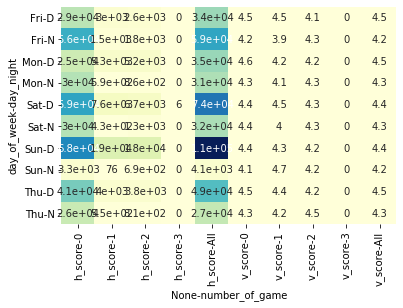

In [68]:
# можно использовать разные методы, о style лушче и !не изменяет струтуру данных!
swarm_plot = sns.heatmap(pvt, cmap="YlGnBu", annot=True, cbar=False)
plt.show()

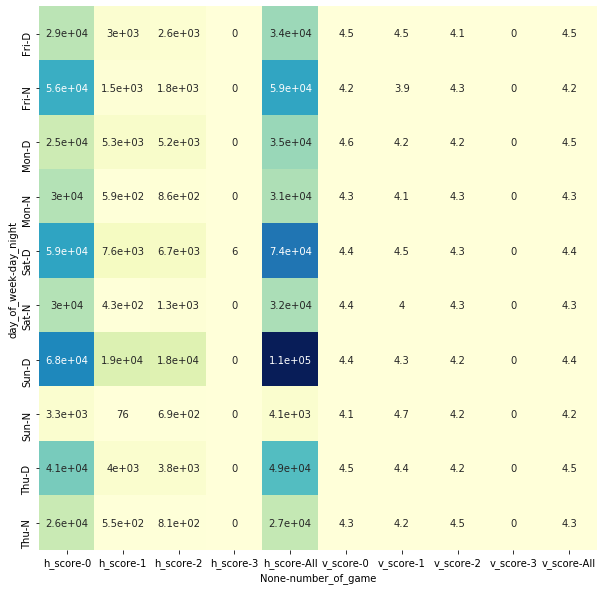

In [69]:
# структура изменена (((
plt.figure(figsize=(10,10))
swarm_plot = sns.heatmap(pvt, cmap="YlGnBu", annot=True, cbar=False)
plt.show()

In [25]:
# добавлять стиль можно ещё до сводной таблице

(df.head(10)
 .style
 # форматирование срок
 .format({"v_score": "P{:2,.0f}", "h_score": "P{:2,.0f}",})
 .format({"v_name": lambda x:x.lower(), "h_name": lambda x:x.lower()}
 #взаимодействие с индексом и обработка значений
 )).hide_index()\
.highlight_max(color='lightgreen')\
.highlight_min(color='red')

date,number_of_game,day_of_week,v_name,v_game_number,h_name,h_game_number,v_score,h_score,day_night
18710504,0,Thu,cl1,1,fw1,1,P 0,P 2,D
18710505,0,Fri,bs1,1,ws3,1,P20,P18,D
18710506,0,Sat,cl1,2,rc1,1,P12,P 4,D
18710508,0,Mon,cl1,3,ch1,1,P12,P14,D
18710509,0,Tue,bs1,2,tro,1,P 9,P 5,D
18710511,0,Thu,ch1,2,cl1,4,P18,P10,D
18710513,0,Sat,ws3,2,cl1,5,P12,P 8,D
18710513,0,Sat,ch1,3,fw1,2,P14,P 5,D
18710515,0,Mon,ws3,3,fw1,3,P 6,P12,D
18710516,0,Tue,tro,2,bs1,3,P29,P14,D


In [86]:
# привычней применять градиентное окрашивание
(df.head(10)
 .style
 .format({"v_score": "P{:2,.0f}", "h_score": "P{:2,.0f}",})
 .format({"v_name": lambda x:x.lower(), "h_name": lambda x:x.lower()}
 )).hide_index().background_gradient(cmap='Blues')

date,number_of_game,day_of_week,v_name,v_game_number,h_name,h_game_number,v_score,h_score,day_night
18710504,0,Thu,cl1,1,fw1,1,P 0,P 2,D
18710505,0,Fri,bs1,1,ws3,1,P20,P18,D
18710506,0,Sat,cl1,2,rc1,1,P12,P 4,D
18710508,0,Mon,cl1,3,ch1,1,P12,P14,D
18710509,0,Tue,bs1,2,tro,1,P 9,P 5,D
18710511,0,Thu,ch1,2,cl1,4,P18,P10,D
18710513,0,Sat,ws3,2,cl1,5,P12,P 8,D
18710513,0,Sat,ch1,3,fw1,2,P14,P 5,D
18710515,0,Mon,ws3,3,fw1,3,P 6,P12,D
18710516,0,Tue,tro,2,bs1,3,P29,P14,D


In [28]:
# даже к сводной таблице
pvt.style.background_gradient(cmap='Blues')

In [ ]:
# способы применения стайлинга
# Styler.applymap(func) - к определенным элементам
# Styler.apply(func, axis=0) - к колонке
# Styler.apply(func, axis=1) - к строке 
# Styler.apply(func, axis=None) - к таблице (вся таблица)

In [91]:
# пример применения к таблице 
# с lambda, с функцией проверки на тип
(df.head(10)
 .style
 .format({"v_score": "P{:2,.0f}", "h_score": "P{:2,.0f}",})
 .format({"v_name": lambda x:x.lower(), "h_name": lambda x:x.lower()}
 )).hide_index().applymap(lambda x: f"color: {'red' if isinstance(x,str) else 'black'}")

date,number_of_game,day_of_week,v_name,v_game_number,h_name,h_game_number,v_score,h_score,day_night
18710504,0,Thu,cl1,1,fw1,1,P 0,P 2,D
18710505,0,Fri,bs1,1,ws3,1,P20,P18,D
18710506,0,Sat,cl1,2,rc1,1,P12,P 4,D
18710508,0,Mon,cl1,3,ch1,1,P12,P14,D
18710509,0,Tue,bs1,2,tro,1,P 9,P 5,D
18710511,0,Thu,ch1,2,cl1,4,P18,P10,D
18710513,0,Sat,ws3,2,cl1,5,P12,P 8,D
18710513,0,Sat,ch1,3,fw1,2,P14,P 5,D
18710515,0,Mon,ws3,3,fw1,3,P 6,P12,D
18710516,0,Tue,tro,2,bs1,3,P29,P14,D


In [111]:
# можно добавлять бар-зарисовку
pvt.style.bar(subset='h_score', color='lightgreen')

In [30]:
# разберем сначала способ индексации в сводной таблице
pvt#['h_score'][0]

day_of_week  day_night
Fri          D            28735
             N            55648
Mon          D            24579
             N            29922
Sat          D            59244
             N            30008
Sun          D            68298
             N             3340
Thu          D            41062
             N            25898
Name: 0, dtype: int64

In [118]:
# сделаем окрашивание уже с пониманием индекса
pvt.style.bar(subset=[('h_score', 0)], color='lightgreen')\
         .bar(subset=[('h_score', 1)], color='#ee1f5f')\
         .bar(subset=[('h_score', 2)], color='#FFA07A')\
         .bar(subset=[('h_score', 3)], color='#ee1f5f')\
         .bar(subset=[('h_score', 'All')], color='red')\

### Хотите уметь больше?

In [18]:
# изучите данную библиотеку и вы сможете делать такие графики уже в ячейках
import sparklines

<img src ="Data/spk.png" >

In [17]:
df.head(10).groupby(['day_of_week', 'day_night'])["v_score"].agg(['mean', sparkline])

,,mean,sparkline
day_of_week,day_night,,
Fri,D,20.000000,iVBORw0KGgoAAAANSUhEUgAAASAAAAASCAYAAAD7RgOSAA...
Mon,D,9.000000,iVBORw0KGgoAAAANSUhEUgAAASAAAAASCAYAAAD7RgOSAA...
Sat,D,12.666667,iVBORw0KGgoAAAANSUhEUgAAASAAAAASCAYAAAD7RgOSAA...
Thu,D,9.000000,iVBORw0KGgoAAAANSUhEUgAAASAAAAASCAYAAAD7RgOSAA...
Tue,D,19.000000,iVBORw0KGgoAAAANSUhEUgAAASAAAAASCAYAAAD7RgOSAA...


In [6]:
sparkline_str.__name__ = "sparkline"